In [56]:
%matplotlib inline

In [57]:
import matplotlib
import torch
from src.current_modelling_with_metal_influence import *
matplotlib.rcParams['figure.figsize'] = (7.0, 5.0)

In [58]:
xi = np.linspace(0, 3, 1000000)
x_train = []
for i in range(len(xi)):
    if i % 200 == 0:
        x_train.append(xi[i])
x_train = np.array(x_train)
yi = sort_current_density(1.72, 1.02, xi, 300, 0.15)
y_train = []
for i in range(len(yi)):
    if i % 200 == 0:
        y_train.append(yi[i])
y_train = np.array(y_train)

447859
1.3435783435783437


Text(0.5, 1.0, '$I(V)$')

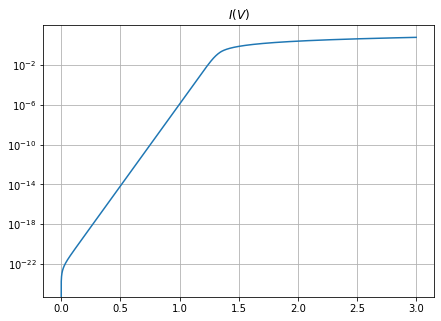

In [59]:
plt.plot(x_train, y_train)
plt.yscale("log")
plt.grid()
plt.title('$I(V)$')

In [60]:
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[0.0000e+00],
        [9.4090e-25],
        [1.9034e-24],
        ...,
        [5.7240e+00],
        [5.7260e+00],
        [5.7280e+00]])

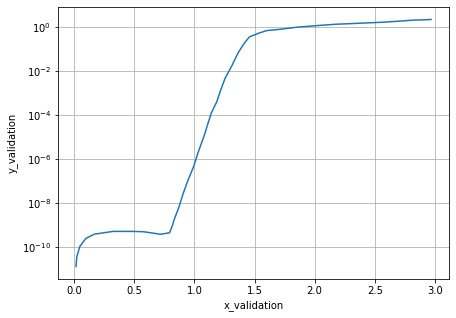

In [61]:
with open("../csv/Ag.csv") as f_obj:
    x_validation = csv_dict_reader(f_obj, "V")
with open("../csv/Ag.csv") as f_obj:
    y_validation = csv_dict_reader(f_obj, "I")
x_validation = torch.tensor(x_validation)
y_validation = torch.tensor(y_validation)
plt.plot(x_validation.numpy(), y_validation.numpy())
plt.yscale("log")
plt.grid()
plt.xlabel('x_validation')
plt.ylabel('y_validation');


In [62]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[1.2933e-11],
        [3.4904e-11],
        [1.0516e-10],
        [2.4486e-10],
        [3.8036e-10],
        [5.0946e-10],
        [5.0848e-10],
        [4.8955e-10],
        [3.7780e-10],
        [4.3726e-10],
        [9.8165e-10],
        [1.7039e-09],
        [5.9462e-09],
        [2.6843e-08],
        [1.0082e-07],
        [4.7213e-07],
        [1.7095e-06],
        [1.2444e-05],
        [3.4834e-05],
        [1.2157e-04],
        [3.7991e-04],
        [1.2319e-03],
        [4.4600e-03],
        [1.6748e-02],
        [6.2899e-02],
        [1.6966e-01],
        [3.4102e-01],
        [5.1053e-01],
        [6.5990e-01],
        [7.3601e-01],
        [9.5017e-01],
        [1.1393e+00],
        [1.2703e+00],
        [1.4669e+00],
        [1.5764e+00],
        [1.7572e+00],
        [1.9594e+00],
        [2.0303e+00],
        [2.1051e+00]])

In [63]:
class CurrentNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(CurrentNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act3 = torch.nn.Sigmoid()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x

current_net = CurrentNet(900)


In [64]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()
optimizer = torch.optim.Adam(current_net.parameters(), lr=1.0e-3)

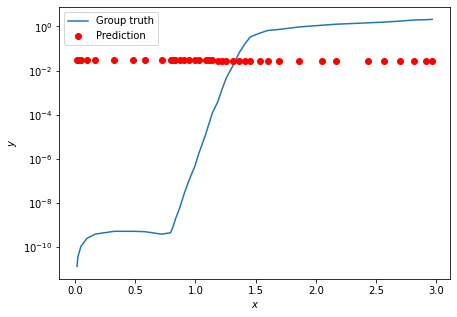

In [65]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), label='Group truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
    plt.legend(loc='upper left')
    plt.yscale("log")
    plt.gray()
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(current_net, x_validation, y_validation)

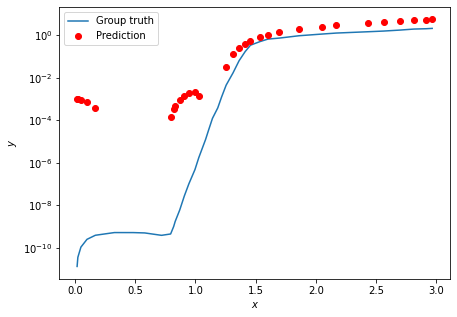

In [66]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = current_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(current_net, x_validation, y_validation)
